### *BigData Girls Group*
#### *Nour Abu Baider 166542*
#### *Naba Alghudran 1647138*
#### *Hala Ali 147651*

## *Install the required Libraries*

In [3]:
!pip install isbnlib
!pip install goodreads
!pip3 install newspaper3k
!pip install lxml_html_clean
!pip install progressbar

In [141]:
import numpy as np 
import pandas as pd
import os
import seaborn as sns
import isbnlib
from newspaper import Article
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from progressbar import ProgressBar
import re
from sklearn.neighbors import NearestNeighbors
from pylab import plot, show
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
from sklearn import neighbors
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error

In [5]:
import warnings
warnings.filterwarnings("ignore")

## *Reading the Dataset*

In [7]:
df = pd.read_csv('Upmerged_file.csv')
df.index = df['Id']               #book id

In [8]:
#Finding Number of rows and columns
print("Dataset contains {} rows and {} columns".format(df.shape[0], df.shape[1]))

Dataset contains 1850310 rows and 21 columns


In [9]:
print(df.columns)

Index(['Id', 'Name', 'RatingDist1', 'pagesNumber', 'RatingDist4',
       'RatingDistTotal', 'PublishMonth', 'PublishDay', 'Publisher',
       'CountsOfReview', 'PublishYear', 'Language', 'Authors', 'Rating',
       'RatingDist2', 'RatingDist5', 'ISBN', 'RatingDist3', 'Description',
       'Count of text reviews', 'PagesNumber'],
      dtype='object')


In [10]:
df.head(5)

,Id,Name,RatingDist1,pagesNumber,RatingDist4,RatingDistTotal,PublishMonth,PublishDay,Publisher,CountsOfReview,...,Language,Authors,Rating,RatingDist2,RatingDist5,ISBN,RatingDist3,Description,Count of text reviews,PagesNumber
Id,,,,,,,,,,,,,,,,,,,,,
1,1,Harry Potter and the Half-Blood Prince (Harry ...,1:9896,652.0,4:556485,total:2298124,16,9,Scholastic Inc.,28062,...,eng,J.K. Rowling,4.57,2:25317,5:1546466,NaN,3:159960,NaN,NaN,NaN
2,2,Harry Potter and the Order of the Phoenix (Har...,1:12455,870.0,4:604283,total:2358637,1,9,Scholastic Inc.,29770,...,eng,J.K. Rowling,4.50,2:37005,5:1493113,0439358078,3:211781,NaN,NaN,NaN
3,3,Harry Potter and the Sorcerer's Stone (Harry P...,1:108202,309.0,4:1513191,total:6587388,1,11,Scholastic Inc,75911,...,eng,J.K. Rowling,4.47,2:130310,5:4268227,NaN,3:567458,NaN,NaN,NaN
4,4,Harry Potter and the Chamber of Secrets (Harry...,1:11896,352.0,4:706082,total:2560657,1,11,Scholastic,244,...,eng,J.K. Rowling,4.42,2:49353,5:1504505,0439554896,3:288821,NaN,NaN,NaN
5,5,Harry Potter and the Prisoner of Azkaban (Harr...,1:10128,435.0,4:630534,total:2610317,1,5,Scholastic Inc.,37093,...,eng,J.K. Rowling,4.57,2:24849,5:1749958,043965548X,3:194848,NaN,NaN,NaN


## *Pre-Processing the Data*



#### *Handling Missing Values*
##### *Filling Numircal missing value with median , and Filling the categorical missing values with the mode*


In [12]:
# Check for missing values
print("Missing Values in Each Column:")
print(df.isnull().sum())



Missing Values in Each Column:
Id                             0
Name                           0
RatingDist1                    0
pagesNumber              1015232
RatingDist4                    0
RatingDistTotal                0
PublishMonth                   0
PublishDay                     0
Publisher                  17826
CountsOfReview                 0
PublishYear                    0
Language                 1598488
Authors                        0
Rating                         0
RatingDist2                    0
RatingDist5                    0
ISBN                        5923
RatingDist3                    0
Description               679122
Count of text reviews    1440613
PagesNumber               835078
dtype: int64


In [13]:
# Handle missing values for numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    if df[col].isnull().sum() > 0:  # Check if the column has missing values
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True)
        print(f"Filled missing values in numerical column '{col}' with median: {median_value}")


Filled missing values in numerical column 'pagesNumber' with median: 240.0
Filled missing values in numerical column 'Count of text reviews' with median: 1.0
Filled missing values in numerical column 'PagesNumber' with median: 232.0


In [14]:
# Handle missing values for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df[col].isnull().sum() > 0:  # Check if the column has missing values
        mode_value = df[col].mode()[0]
        df[col].fillna(mode_value, inplace=True)
        print(f"Filled missing values in categorical column '{col}' with mode: {mode_value}")



Filled missing values in categorical column 'Publisher' with mode: Routledge
Filled missing values in categorical column 'Language' with mode: eng
Filled missing values in categorical column 'ISBN' with mode: 006053818X
Filled missing values in categorical column 'Description' with mode: This scarce antiquarian book is a facsimile reprint of the original. Due to its age, it may contain imperfections such as marks, notations, marginalia and flawed pages. Because we believe this work is culturally important, we have made it available as part of our commitment for protecting, preserving, and promoting the world's literature in affordable, high quality, modern editions that are true to the original work.


In [15]:
# Verify if there are any remaining missing values
print("\nMissing Values After Handling:")
print(df.isnull().sum())


Missing Values After Handling:
Id                       0
Name                     0
RatingDist1              0
pagesNumber              0
RatingDist4              0
RatingDistTotal          0
PublishMonth             0
PublishDay               0
Publisher                0
CountsOfReview           0
PublishYear              0
Language                 0
Authors                  0
Rating                   0
RatingDist2              0
RatingDist5              0
ISBN                     0
RatingDist3              0
Description              0
Count of text reviews    0
PagesNumber              0
dtype: int64


#### *Adjust the RatingDistTotal colunm to have only numeric values*

In [17]:
# Remove "total:" from every cell in the 'RatingDistTotal' column and keeping only the total in numbers
df['RatingDistTotal'] = df['RatingDistTotal'].str.replace("total:", "")

#  convert the column to integers 
df['RatingDistTotal'] = df['RatingDistTotal'].astype(int)  

# Display the updated DataFrame
print(df.head())


    Id                                               Name RatingDist1  \
Id                                                                      
1    1  Harry Potter and the Half-Blood Prince (Harry ...      1:9896   
2    2  Harry Potter and the Order of the Phoenix (Har...     1:12455   
3    3  Harry Potter and the Sorcerer's Stone (Harry P...    1:108202   
4    4  Harry Potter and the Chamber of Secrets (Harry...     1:11896   
5    5  Harry Potter and the Prisoner of Azkaban (Harr...     1:10128   

    pagesNumber RatingDist4  RatingDistTotal  PublishMonth  PublishDay  \
Id                                                                       
1         652.0    4:556485          2298124            16           9   
2         870.0    4:604283          2358637             1           9   
3         309.0   4:1513191          6587388             1          11   
4         352.0    4:706082          2560657             1          11   
5         435.0    4:630534          2610317

In [18]:
print(df.columns)

Index(['Id', 'Name', 'RatingDist1', 'pagesNumber', 'RatingDist4',
       'RatingDistTotal', 'PublishMonth', 'PublishDay', 'Publisher',
       'CountsOfReview', 'PublishYear', 'Language', 'Authors', 'Rating',
       'RatingDist2', 'RatingDist5', 'ISBN', 'RatingDist3', 'Description',
       'Count of text reviews', 'PagesNumber'],
      dtype='object')


### *Transformation : Normlization the rating columns and dropping the ISBN*

In [20]:
#Extract numeric part of rating columns if they are in the format '1:9896'

rating_columns = ['RatingDist1', 'RatingDist2', 'RatingDist3' , "RatingDist4"]
for col in rating_columns:
    df[col] = df[col].str.split(':').str[1].astype(float)

# Normalize rating columns to the range [0, 5]
scaler = MinMaxScaler(feature_range=(0, 5))
df[rating_columns] = scaler.fit_transform(df[rating_columns])

# Drop the 'ISBN' column as it's not needed for KNN-based recommendations
df.drop(columns=['ISBN'], inplace=True)


In [21]:
print(df[rating_columns].head())


    RatingDist1  RatingDist2  RatingDist3  RatingDist4
Id                                                    
1      0.089900     0.232653     0.789407     1.455122
2      0.113147     0.340061     1.045146     1.580107
3      0.982961     1.197497     2.800422     3.956760
4      0.108069     0.453535     1.425340     1.846295
5      0.092008     0.228353     0.961581     1.648749


# *Analysis & Understanding the Data*

## *The books that have the most occurances in the list*

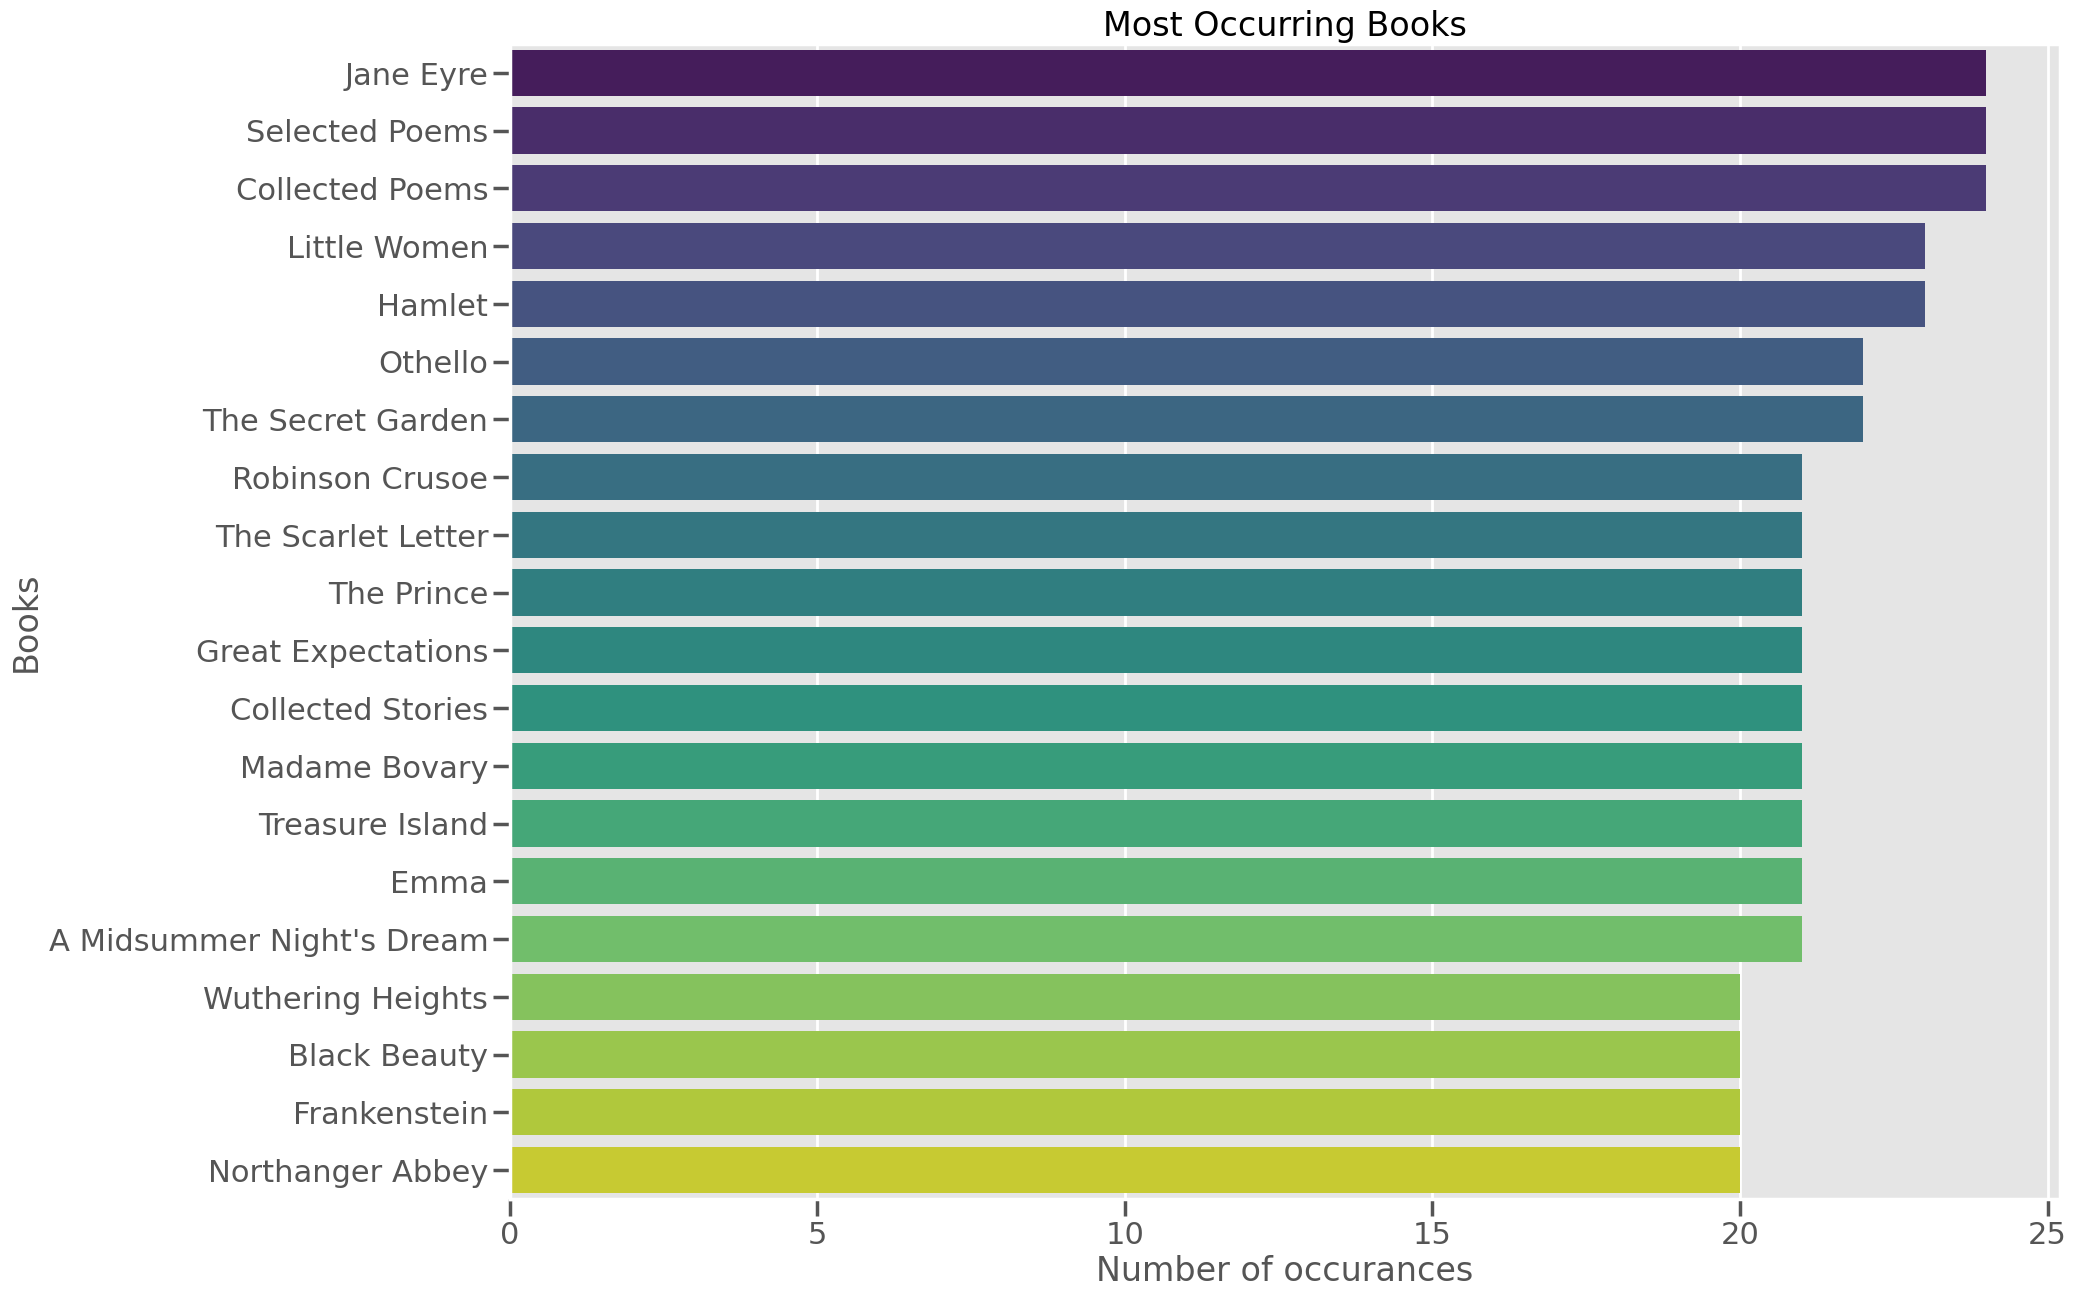

In [24]:
#Taking the first 20:

sns.set_context('poster')
plt.figure(figsize=(20,15))
books = df['Name'].value_counts()[:20]
rating = df.Rating[:20]
sns.barplot(x = books, y = books.index, palette='viridis')
plt.title("Most Occurring Books")
plt.xlabel("Number of occurances")
plt.ylabel("Books")
plt.show()

### We can see that Jane Eyer have the most number of occurrances with the same name in the data.
### These books in list have come up in this database over and over again, with various publication editions.

In [26]:
df.RatingDistTotal[:5]

Id
1    2298124
2    2358637
3    6587388
4    2560657
5    2610317
Name: RatingDistTotal, dtype: int32

## *The Top 10 Most Rated Books in the list*

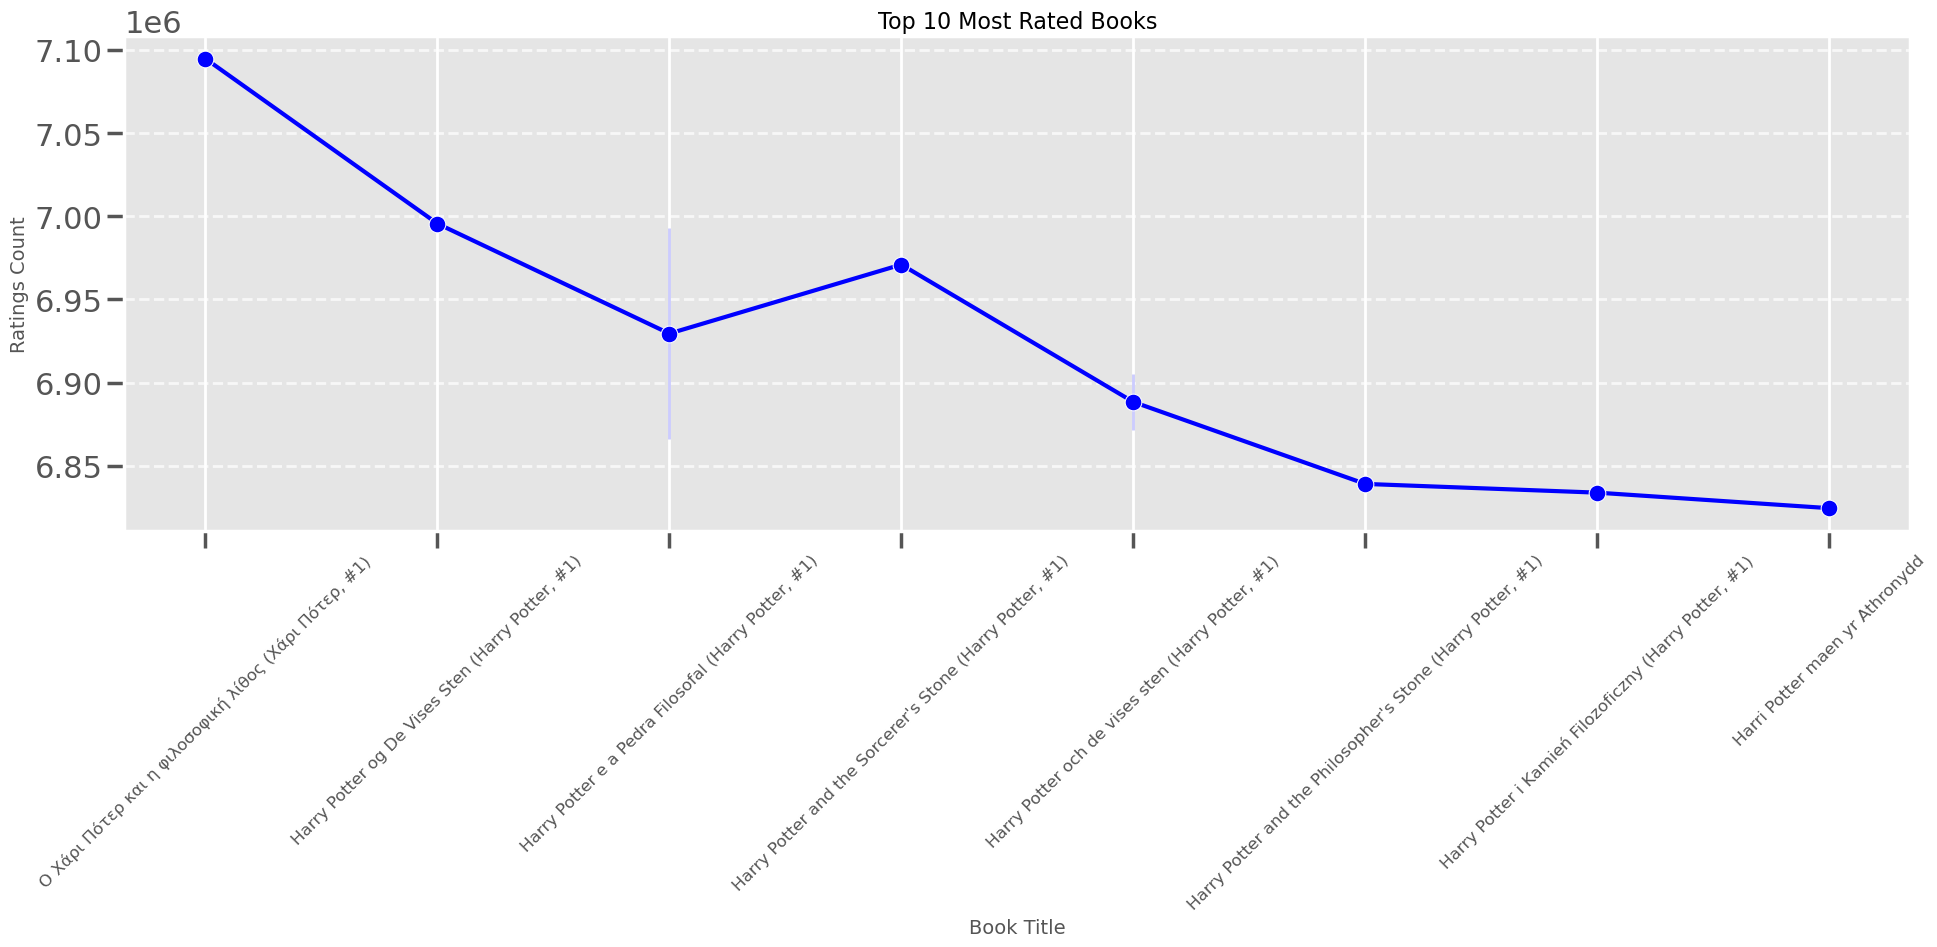

In [28]:
# Sort the DataFrame by 'RatingDistTotal' 
most_rated = df.sort_values('RatingDistTotal', ascending=False).head(10)

# Plot the line chart
plt.figure(figsize=(20, 10))
sns.lineplot(x=most_rated['Name'], y=most_rated['RatingDistTotal'], marker='o', linestyle='-', color='blue')
plt.title("Top 10 Most Rated Books", fontsize=16)
plt.xlabel("Book Title", fontsize=14)
plt.ylabel("Ratings Count", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### The Harry Potter series, across its various editions over the years, has consistently ranked in the top ten most-rated books, reflecting its enduring popularity and widespread love among readers.

## *The top 10 highly rated authors*

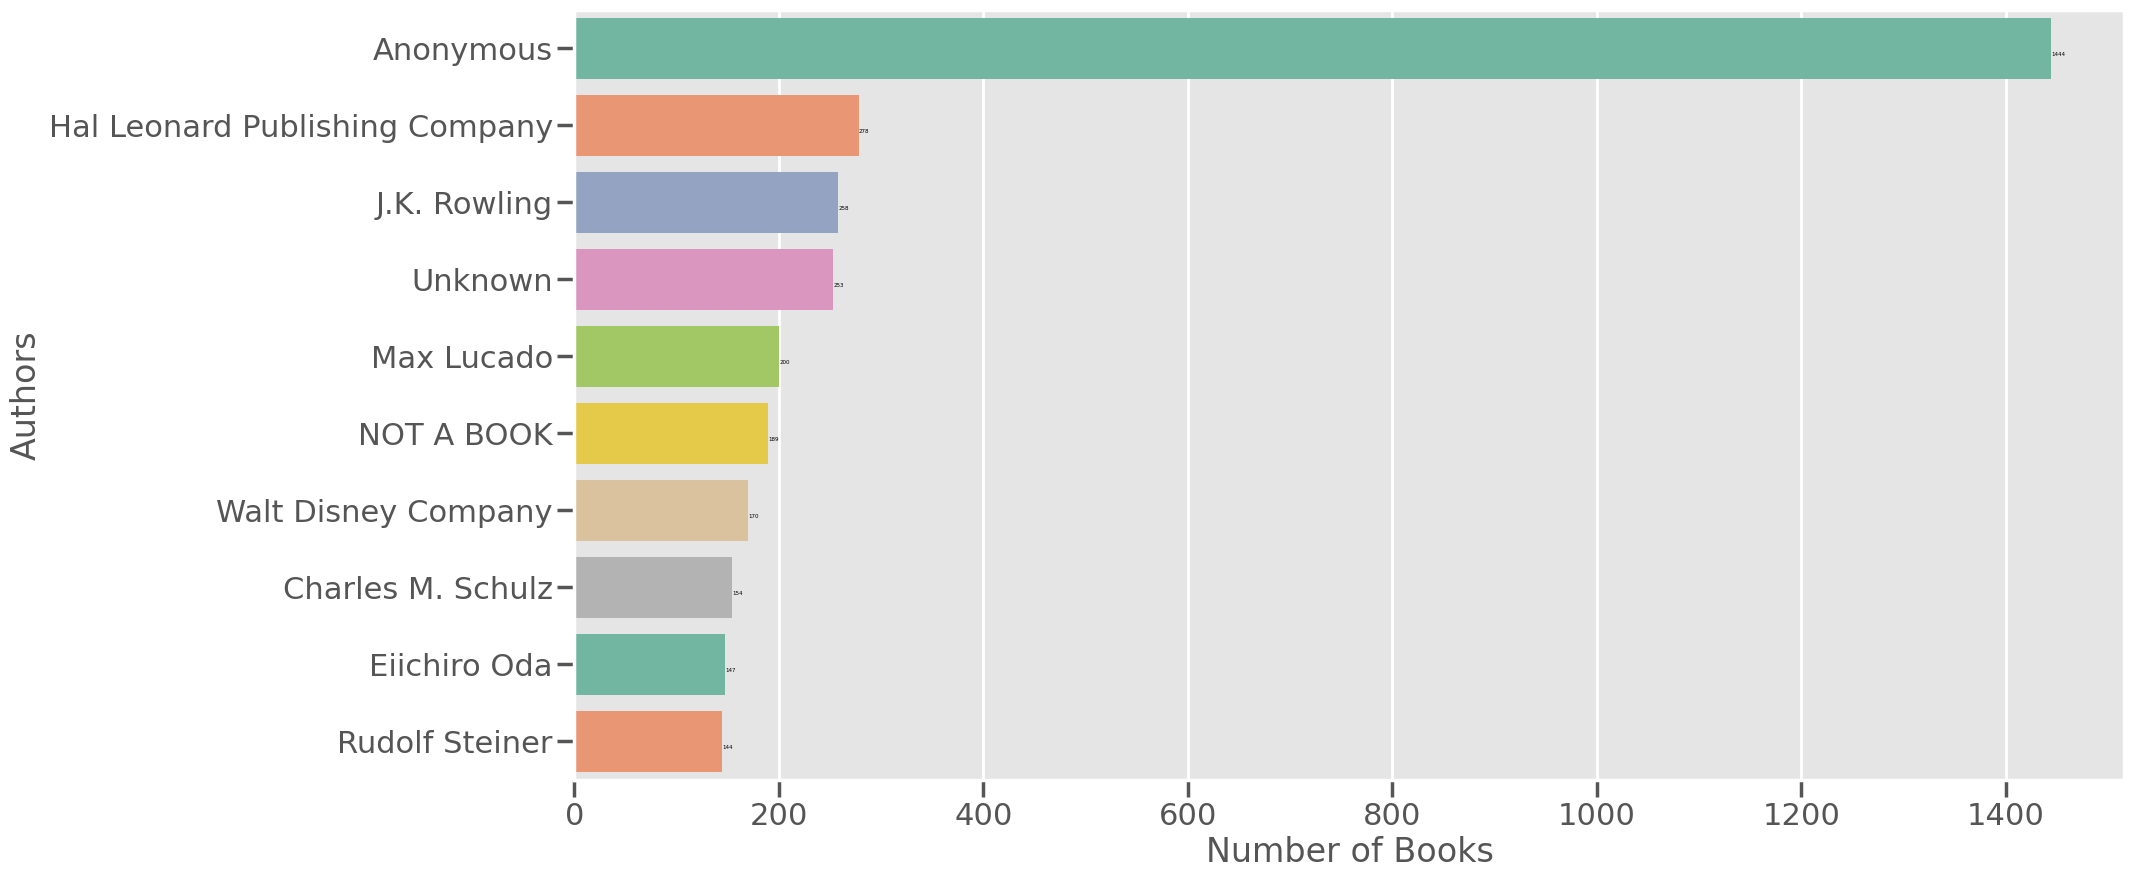

In [31]:

# Filter high-rated authors
high_rated_author = df[df['Rating'] >= 4.3]
high_rated_author = high_rated_author.groupby('Authors')['Name'].count().reset_index().sort_values('Name', ascending=False).head(10).set_index('Authors')

# Plot
plt.figure(figsize=(20, 10))
ax = sns.barplot(x=high_rated_author['Name'], y=high_rated_author.index, palette='Set2')
ax.set_xlabel("Number of Books")
ax.set_ylabel("Authors")

# Add the count of books on top of the bars
for i in ax.patches:
    ax.text(i.get_width() + 0.3, i.get_y() + 0.5, str(round(i.get_width())), fontsize=4, color='k')

plt.show()


### "Anonymous Author" ranks highest, it shows that great work can still become famous and highly rated without a known name.

## *Top 10 Books with the Most Reviews*

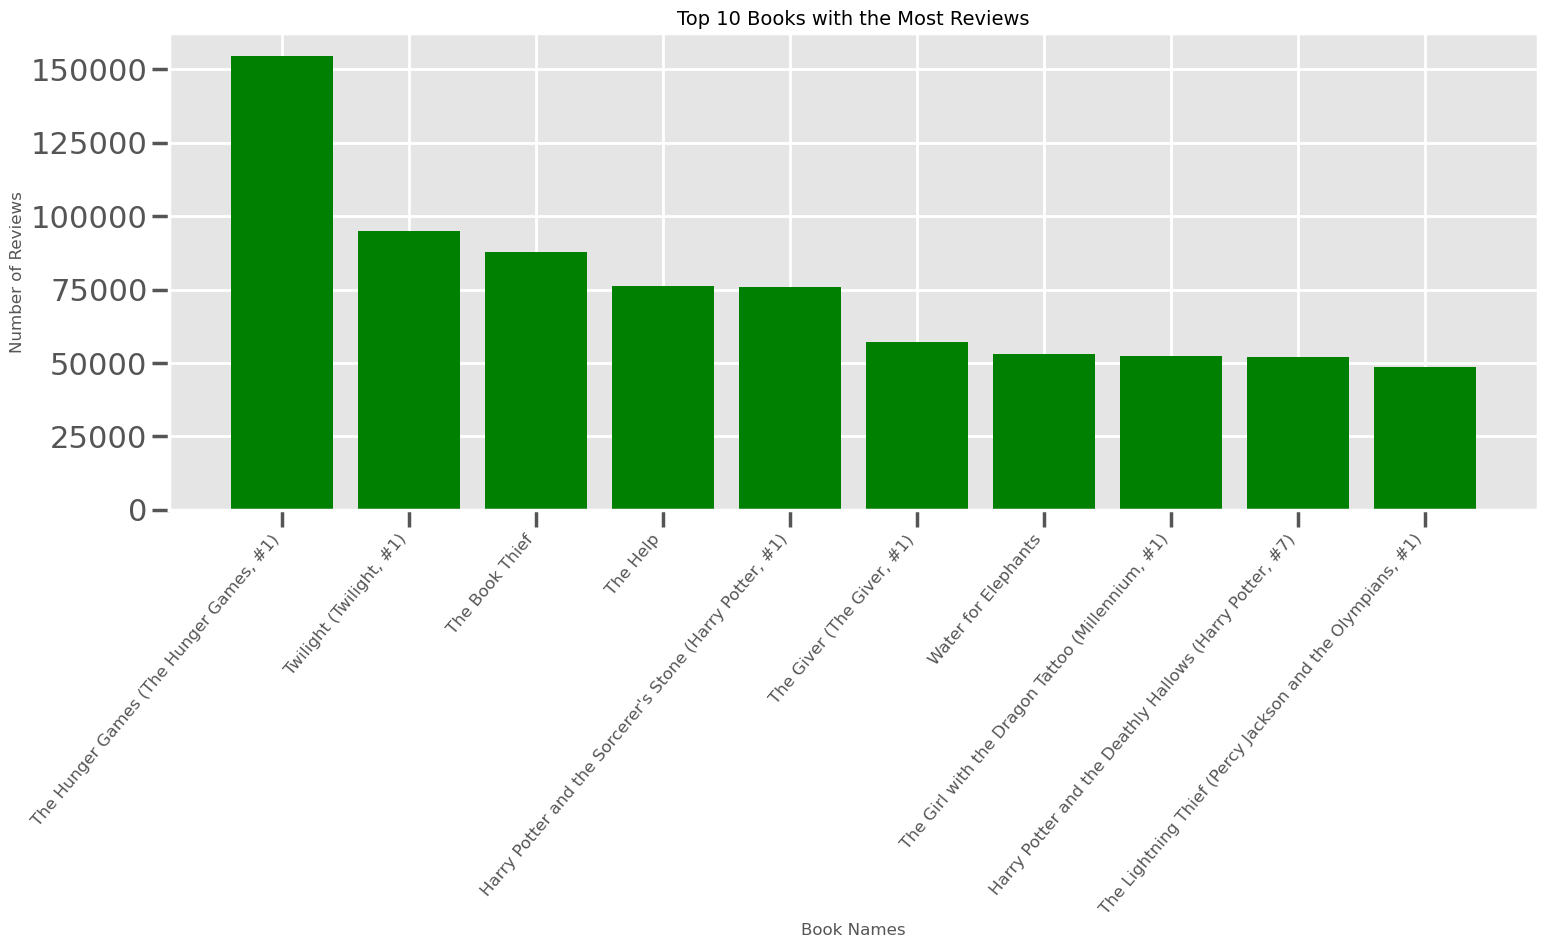

In [34]:
# Sort the DataFrame by CountOfReview in descending order
df_sorted = df.sort_values(by='CountsOfReview', ascending=False)

# Get the top 10 books with the highest number of reviews
top_books = df_sorted.head(10)

# Plot the bar chart
plt.figure(figsize=(16, 10))
plt.bar(top_books['Name'], top_books['CountsOfReview'], color='green')

# Add labels and title
plt.xlabel('Book Names', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.title('Top 10 Books with the Most Reviews', fontsize=14)
plt.xticks(rotation=50, ha='right', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


### TheHungryGames has the most-reviewed book in our list. This highlights its significant popularity and widespread engagement among readers.

## *The distribution of Top 12 Most Common Languages of Books*

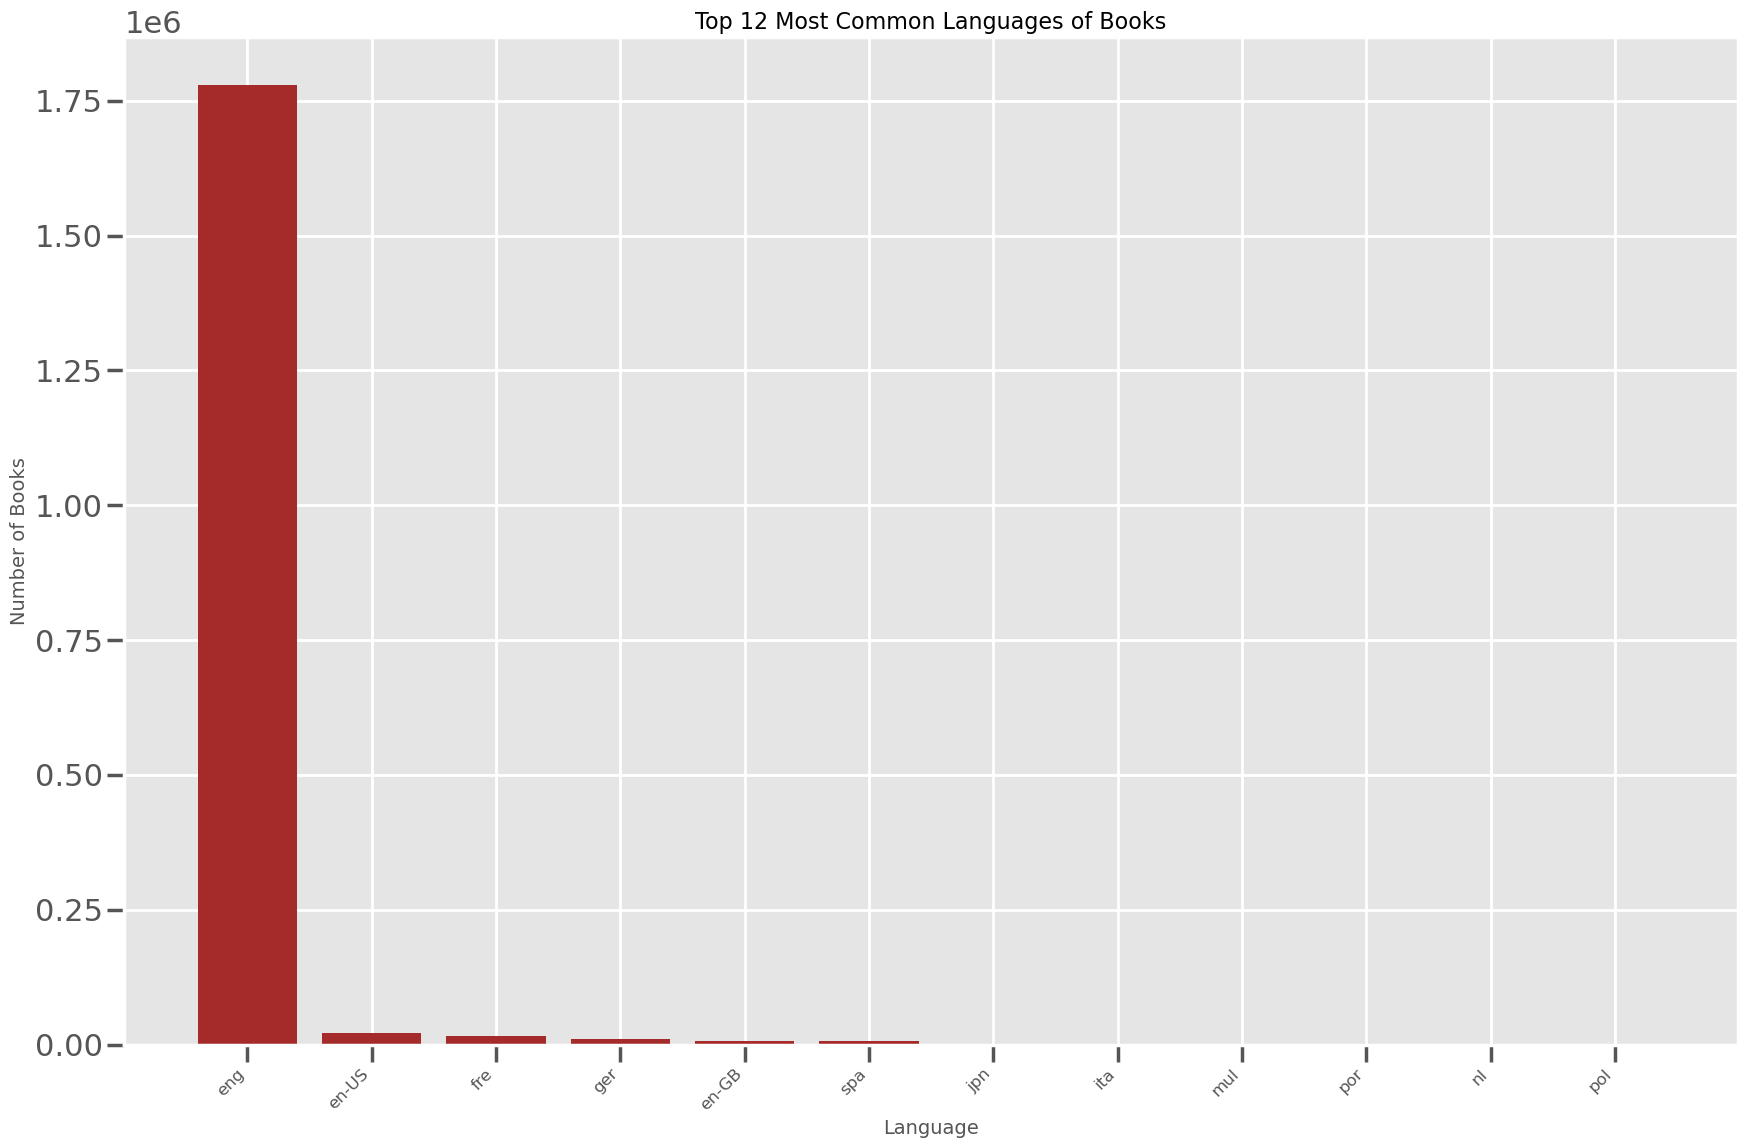

In [37]:
# Group the data by language and count the number of books in each language
language_distribution = df['Language'].value_counts()

# Get the top 12 most common languages
top_languages = language_distribution.head(12)

# Plot the bar chart
plt.figure(figsize=(18, 12))  # Increased figure size
plt.bar(top_languages.index, top_languages.values, color='brown')  # Green bars

# Add labels and title
plt.xlabel('Language', fontsize=14)
plt.ylabel('Number of Books', fontsize=14)
plt.title('Top 12 Most Common Languages of Books', fontsize=16)

# Adjust the x-axis text to avoid overlap
plt.xticks(rotation=45, ha='right', fontsize=12)  # Adjust rotation and font size

# Show the plot
plt.tight_layout()
plt.show()


### English is the language with the most books on our list, showing its wide reach and the large number of readers engaging with it.

In [39]:
print(df.memory_usage(deep=True))  # Check memory usage

Index                      14802480
Id                         14802480
Name                      177740727
RatingDist1                14802480
pagesNumber                14802480
RatingDist4                14802480
RatingDistTotal             7401240
PublishMonth               14802480
PublishDay                 14802480
Publisher                 123827175
CountsOfReview             14802480
PublishYear                14802480
Language                   96274417
Authors                   118672080
Rating                     14802480
RatingDist2                14802480
RatingDist5                97077224
RatingDist3                14802480
Description              1377009491
Count of text reviews      14802480
PagesNumber                14802480
dtype: int64


In [40]:
data = df.reset_index(drop=True)  # Reset index and drop the old one

## *Generating a User-Item Matrix*

In [42]:
user_item_matrix = data.pivot_table(
    index='Id',
    values='Rating',
    aggfunc='mean'
).fillna(0)

## *Normalize the matrix*

In [44]:
scaler = MinMaxScaler()
normalized_matrix = scaler.fit_transform(user_item_matrix)

## *Number of recommendations based on dataset size*

In [46]:
dataset_size = len(user_item_matrix)
if dataset_size < 1000:
    num_recommendations = 5
elif dataset_size < 100000:
    num_recommendations = 10
else:
    num_recommendations = 20

print(num_recommendations)

20


## *The Machine Learning model to make the recommendations :* 
### *K-Nearest Neighbors for Book Recommendations*

In [48]:
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(normalized_matrix)

book_index = 0
# Call kneighbors with the chosen number of recommendations
distances, indices = knn.kneighbors(
    [normalized_matrix[book_index]],
    n_neighbors=num_recommendations + 1  # +1 to exclude the book itself
)

In [49]:
# Exclude the first neighbor (which is the book itself)
recommended_indices = indices.flatten()[1:num_recommendations + 1]

In [50]:
# Retrieve the recommended books' details
recommended_books = data.loc[recommended_indices]

# Display recommended books with better formatting
styled_df = recommended_books[['Name', 'Authors', 'Rating']].style.set_table_styles(
    [{'selector': 'th', 'props': [('font-size', '15px'), ('text-align', 'center')]},
     {'selector': 'td', 'props': [('font-size', '13px'), ('text-align', 'left')]}]
).set_caption("Recommended Books").background_gradient(subset=['Rating'], cmap='Blues')
styled_df

,Name,Authors,Rating
1048034,The Minuteman: Returning to an Army of the People,Gary Hart,3.330000
1048032,Physical Properties and Data of Optical Materials,Moriaki Wakaki,0.000000
1048029,The Graveyard Shift,Carmel Reilly,0.000000
1048050,"Is It Possible to Live This Way?: An Unusual Approach to Christian Experience, Volume 1: Faith",Luigi Giussani,4.360000
1048027,My Father's Son,Terri Fields,3.640000
1048023,Libertad,Alma Fullerton,4.180000
1048030,Empress of Asia,Adam Lewis Schroeder,3.210000
1048028,Matchit,Martha Moore,3.670000
1048033,Men in the Kitchen: A Complete Cookery Lesson with TV Chef Emma Crowhurst,Emma Crowhurst,0.000000
1048048,Raise Your Glasses,Phyllis Shindler,0.000000


In [51]:
# Combine indices and distances for ranking
recommendations = pd.DataFrame({
    'BookIndex': recommended_indices,
    'Distance': distances.flatten()[1:num_recommendations + 1]
}).sort_values(by='Distance')

# Merge with the original dataset to get book details
final_recommendations = recommendations.merge(data, left_on='BookIndex', right_index=True)

# Style the dataframe
styled_recommendations = final_recommendations[['Name', 'Authors', 'Rating', 'Distance']].style.set_table_styles(
    [{'selector': 'th', 'props': [('font-size', '15px'), ('text-align', 'center')]},
     {'selector': 'td', 'props': [('font-size', '13px'), ('text-align', 'left')]}]
).set_caption("Ranked Recommendations").background_gradient(subset=['Distance'], cmap='Reds')
styled_recommendations


,Name,Authors,Rating,Distance
0,The Minuteman: Returning to an Army of the People,Gary Hart,3.330000,0.000000
17,Le Choc des civilisations,Samuel P. Huntington,3.750000,0.000000
16,Die Like a Dog,Brett Halliday,3.620000,0.000000
15,"Making It: Black Youth, Racism and Career Aspirations in a Big City",Carl E. James,0.000000,0.000000
14,Promoting Community Change: Making It Happen in the Real World,Mark S. Homan,3.840000,0.000000
13,Palomas,Keila Ochoa Harris,4.250000,0.000000
12,The Wire Cutters,Mollie E. Moore Davis,3.560000,0.000000
11,Jane Gilmore Rushing: A West Texas Writer and Her Work,Lou Halsell Rodenberger,4.000000,0.000000
10,"Her Work, Stories by Texas Women",Deanna J. Sands,0.000000,0.000000
9,Raise Your Glasses,Phyllis Shindler,0.000000,0.000000


In [52]:
# Example: Filter books with at least 100 reviews
filtered_recommendations = final_recommendations[final_recommendations['CountsOfReview'] >= 100]

In [53]:
# Save recommendations to a CSV file
final_recommendations[['Name', 'Authors', 'Rating', 'Distance']].to_csv('recommendations.csv', index=False)


styled_df = final_recommendations[['Name', 'Authors', 'Rating']].style.set_table_styles(
    [{'selector': 'th', 'props': [('font-size', '15px'), ('text-align', 'center')]},
     {'selector': 'td', 'props': [('font-size', '13px'), ('text-align', 'left')]}]
).set_caption("Final Books Recommendations ").background_gradient(subset=['Rating'], cmap='autumn')
styled_df


,Name,Authors,Rating
0,The Minuteman: Returning to an Army of the People,Gary Hart,3.330000
17,Le Choc des civilisations,Samuel P. Huntington,3.750000
16,Die Like a Dog,Brett Halliday,3.620000
15,"Making It: Black Youth, Racism and Career Aspirations in a Big City",Carl E. James,0.000000
14,Promoting Community Change: Making It Happen in the Real World,Mark S. Homan,3.840000
13,Palomas,Keila Ochoa Harris,4.250000
12,The Wire Cutters,Mollie E. Moore Davis,3.560000
11,Jane Gilmore Rushing: A West Texas Writer and Her Work,Lou Halsell Rodenberger,4.000000
10,"Her Work, Stories by Texas Women",Deanna J. Sands,0.000000
9,Raise Your Glasses,Phyllis Shindler,0.000000


## *Evaluation in three ways : 1. Confusion Metrix*

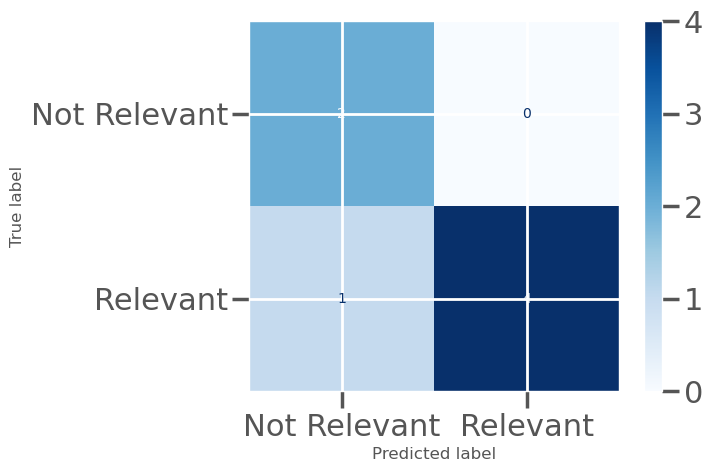

In [161]:
# Define ground truth and predictions
true_labels = np.array([1, 0, 1, 1, 0, 1, 1])  # True relevance of items
predicted_labels = np.array([1, 0, 1, 0, 0, 1, 1])  # KNN predicted relevance

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Relevant", "Relevant"])
disp.plot(cmap="Blues")


### *2.Precision@K and Recall@K*
#### *Precision@K: The proportion of recommended items in the top K that are relevant.*
#### *Recall@K: The proportion of relevant items retrieved in the top K.*

In [171]:
def precision_at_k(recommended_items, relevant_items, k):
    # Get the top K recommended items
    top_k = recommended_items[:k]
    
    # Calculate the proportion of top K items that are relevant
    return len(set(top_k) & set(relevant_items)) / len(top_k)

def recall_at_k(recommended_items, relevant_items, k):
    # Get the top K recommended items
    top_k = recommended_items[:k]
    
    # Calculate the proportion of relevant items captured in the top K
    return len(set(top_k) & set(relevant_items)) / len(relevant_items)


In [173]:
recommended_indices = [10, 5, 2, 19, 8]  # Indices from KNN recommendations
relevant_indices = [5, 11, 18]  # Books the user considers relevant
k = 3

# Calculate metrics
precision = precision_at_k(recommended_indices, relevant_indices, k)
recall = recall_at_k(recommended_indices, relevant_indices, k)

print(f"Precision@{k}: {precision}")
print(f"Recall@{k}: {recall}")

Precision@3: 0.3333333333333333
Recall@3: 0.3333333333333333


In [167]:
rmse = np.sqrt(mean_squared_error(true_labels, predicted_labels))
print(f"RMSE: {rmse}")

RMSE: 0.3779644730092272
